# Carnivore

### Introduction and Purpose

This notebook compares the world's most popular meat production (beef, chicken, and swine/pig) to the world's population over time (from the year 1961 to the year 2021). The goal is to determine whether food production is keeping up with global population growth.

### Meat Production

The world's meat production data was gathered from the [Food and Agriculture Organization of the United Nations](https://www.fao.org/faostat/en/#data/QCL). The following image displays the constraints used to derive the CSV of beef, chicken, and swine production data:

![FAO Data Constraints](public/FAO_data_constraints.png 'FAO Data Constraints')

### Population

The world's population data was gathered from the [United Nations' Population Division](https://population.un.org/dataportal/data/indicators/49/locations/900/start/1961/end/2021/table/pivotbylocation). The following image displays the constraints used to derive the CSV of total human population:

![Population Data Constraints](public/population_data_constraints.png 'Population Data Constraints')

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a dataframe from meat production CSV
meat_csv = 'data/FAOSTAT_data_en_9-25-2023.csv'
meat = pd.read_csv(meat_csv)


In [3]:
# Normalize units of data (convert 1000 An -> An)
an_1000 = meat['Unit'].str.contains('1000')
meat.loc[an_1000, 'Value'] *= 1000
meat.loc[an_1000, 'Unit'] = 'An'


In [4]:
# Create beef, chicken, and swine masks
beef = meat['Item'].str.contains('Cattle')
chicken = meat['Item'].str.contains('Chicken')
swine = meat['Item'].str.contains('Swine')

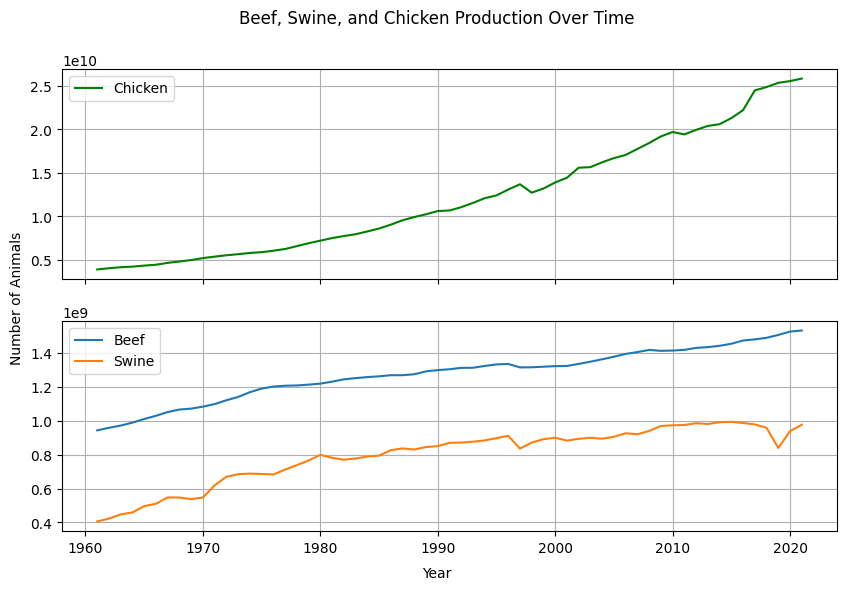

In [5]:
# Graph animal production over time
fig, axs = plt.subplots(2)

# Chicken
axs[0].plot(meat.loc[chicken, 'Year'], meat.loc[chicken, 'Value'], linestyle='-', label='Chicken', color='green')

axs[0].set_xticklabels([])
axs[0].legend(loc='best')
axs[0].grid(True)

# Beef and swine
axs[1].plot(meat.loc[beef,'Year'], meat.loc[beef, 'Value'], linestyle='-', label='Beef')
axs[1].plot(meat.loc[swine, 'Year'], meat.loc[swine, 'Value'], linestyle='-', label='Swine')

axs[1].legend(loc='best')
axs[1].grid(True)

# Format and show
fig.suptitle('Beef, Swine, and Chicken Production Over Time')
fig.text(0.5, 0.04, 'Year', ha='center', va='center')
fig.text(0.08, 0.5, 'Number of Animals', ha='center', va='center', rotation='vertical')

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

In [6]:
# Create a dataframe from world population CSV
pop_csv = 'data/unpopulation_dataportal_20230925160013.csv'
pop = pd.read_csv(pop_csv)

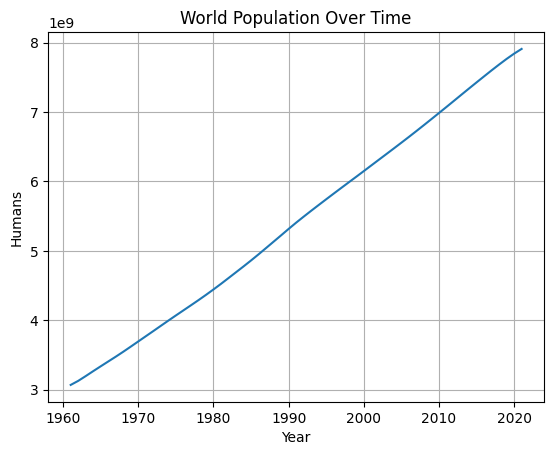

In [7]:
# Graph world population over time
plt.plot(pop['Time'], pop['Value'], linestyle='-')

plt.xlabel('Year')
plt.ylabel('Humans')
plt.title('World Population Over Time')

plt.grid(True)
plt.show()

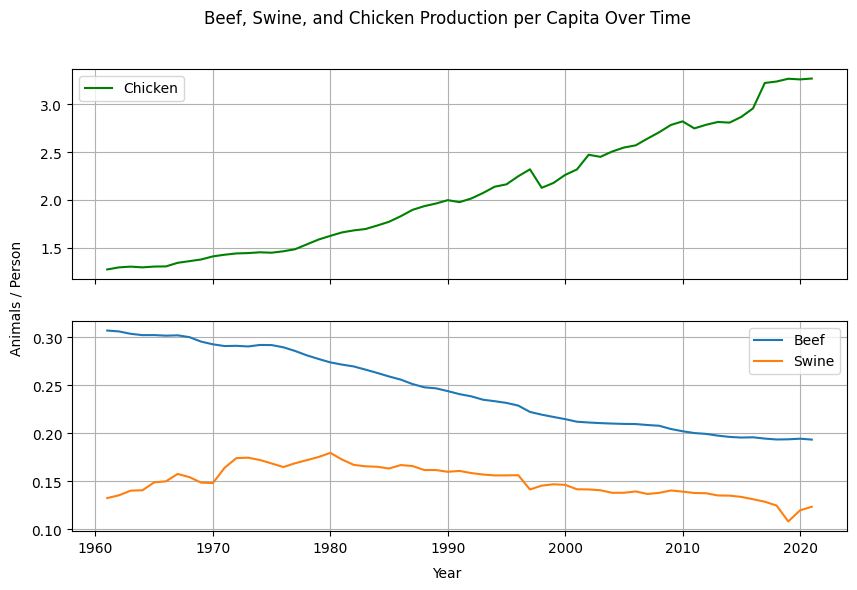

In [8]:
# Graph beef, swine, and chicken production per capita over time
fig, axs = plt.subplots(2)

# Chicken
chicken_pc = meat[chicken].copy().reset_index()
chicken_pc['Value'] = chicken_pc['Value'].divide(pop['Value'])
axs[0].plot(pop['Time'], chicken_pc['Value'], linestyle='-', color='green', label='Chicken')

axs[0].set_xticklabels([])
axs[0].legend(loc='best')
axs[0].grid(True)

# Beef and swine
beef_pc = meat[beef].copy().reset_index()
beef_pc['Value'] = beef_pc['Value'].divide(pop['Value'])
axs[1].plot(pop['Time'], beef_pc['Value'], linestyle='-', label='Beef')

swine_pc = meat[swine].copy().reset_index()
swine_pc['Value'] = swine_pc['Value'].divide(pop['Value'])
axs[1].plot(pop['Time'], swine_pc['Value'], linestyle='-', label='Swine')

axs[1].legend(loc='best')
axs[1].grid(True)

# Format and show
fig.suptitle('Beef, Swine, and Chicken Production per Capita Over Time')
fig.text(0.5, 0.04, 'Year', ha='center', va='center')
fig.text(0.07, 0.5, 'Animals / Person', ha='center', va='center', rotation='vertical')

fig.set_figheight(6)
fig.set_figwidth(10)

plt.show()

In [9]:
# kcal per slaughtered animal
kcal_per_cow = 430e3 # https://www.lifebygeek.com/2012/11/03/how-much-energy-is-in-a-cow/#:~:text=This%20means%20that%20our%20cow,for%20nearly%20half%20a%20year!
kcal_per_chicken = 5 * (16 / 3.5) * 165 # https://extension.umn.edu/save-money-food/buying-animals-meat-processing#:~:text=A%20typical%20broiler%20chicken%20with,to%205%20pounds%20of%20meat; https://www.medicalnewstoday.com/articles/326767#:~:text=The%20USDA%20itemize%20a%20typical,31%20grams%20(g)%20of%20protein
kcal_per_hog = 285 * 0.57 * (16 / 3) * 200 # https://osbornelivestockequipment.com/news/average-market-pig-weight/#:~:text=At%20the%20end%20of%20the,is%20the%20optimum%20market%20weight; https://ag.ok.gov/wp-content/uploads/2020/11/HOW-MUCH-MEAT-BROCHURE-HOG-MEAT.pdf; https://www.fsis.usda.gov/sites/default/files/import/Pork_Lamb_Nutrition_Facts.pdf

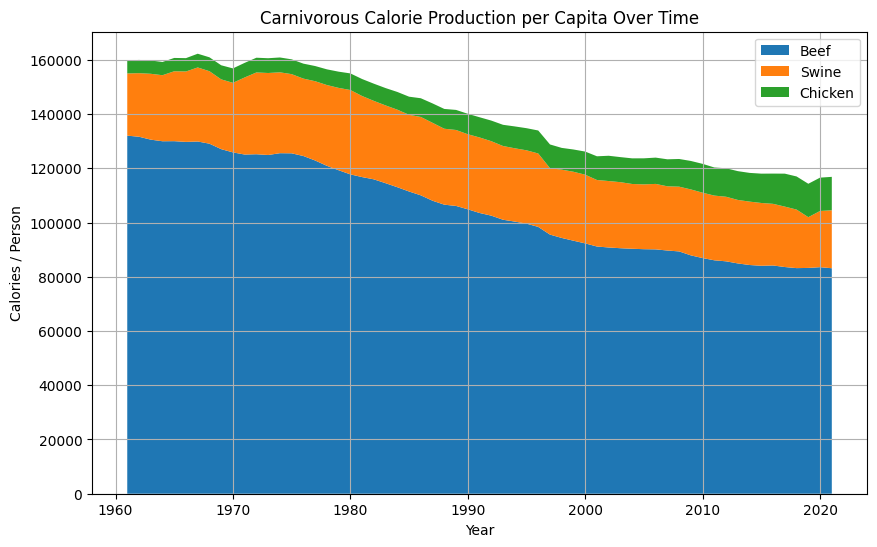

In [10]:
# Graph calorie production per capita over time
plt.figure(figsize=(10, 6))

# Total
plt.stackplot(pop['Time'], 
              beef_pc['Value'] * kcal_per_cow, 
              swine_pc['Value'] * kcal_per_hog, 
              chicken_pc['Value'] * kcal_per_chicken, 
              baseline='zero', labels=['Beef', 'Swine', 'Chicken'])

# Format and show
plt.xlabel('Year')
plt.ylabel('Calories / Person')
plt.title('Carnivorous Calorie Production per Capita Over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

### Takeaways

Maximum meat-calorie production was $162,000$ kcal per capita in the year $1967$. This means that everyone in the world could derive $457$ kcal of energy from meat per day. Since then, per capita meat-calorie production has decreased by $27.8\%$ to $117,000$ kcal in $2021$. Thus, now everyone can only derive $321$ kcal of energy from meat per day.

These figures only account for front-end waste (i.e., discarded organs, bones, etc.). Imagine how many fewer calories the world actually derives from meat if we account for the back-end waste (i.e., unfinished steaks, rotten rotisserie chickens, etc.).